In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [28]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [29]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [30]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [32]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Workclass': 9,
 'Education': 16,
 'Marital_status': 7,
 'Occupation': 15,
 'Relationship': 6,
 'Race': 5,
 'Sex': 2,
 'Native_country': 42,
 'Income': 2}

In [33]:
data.select_dtypes('object')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [34]:
col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

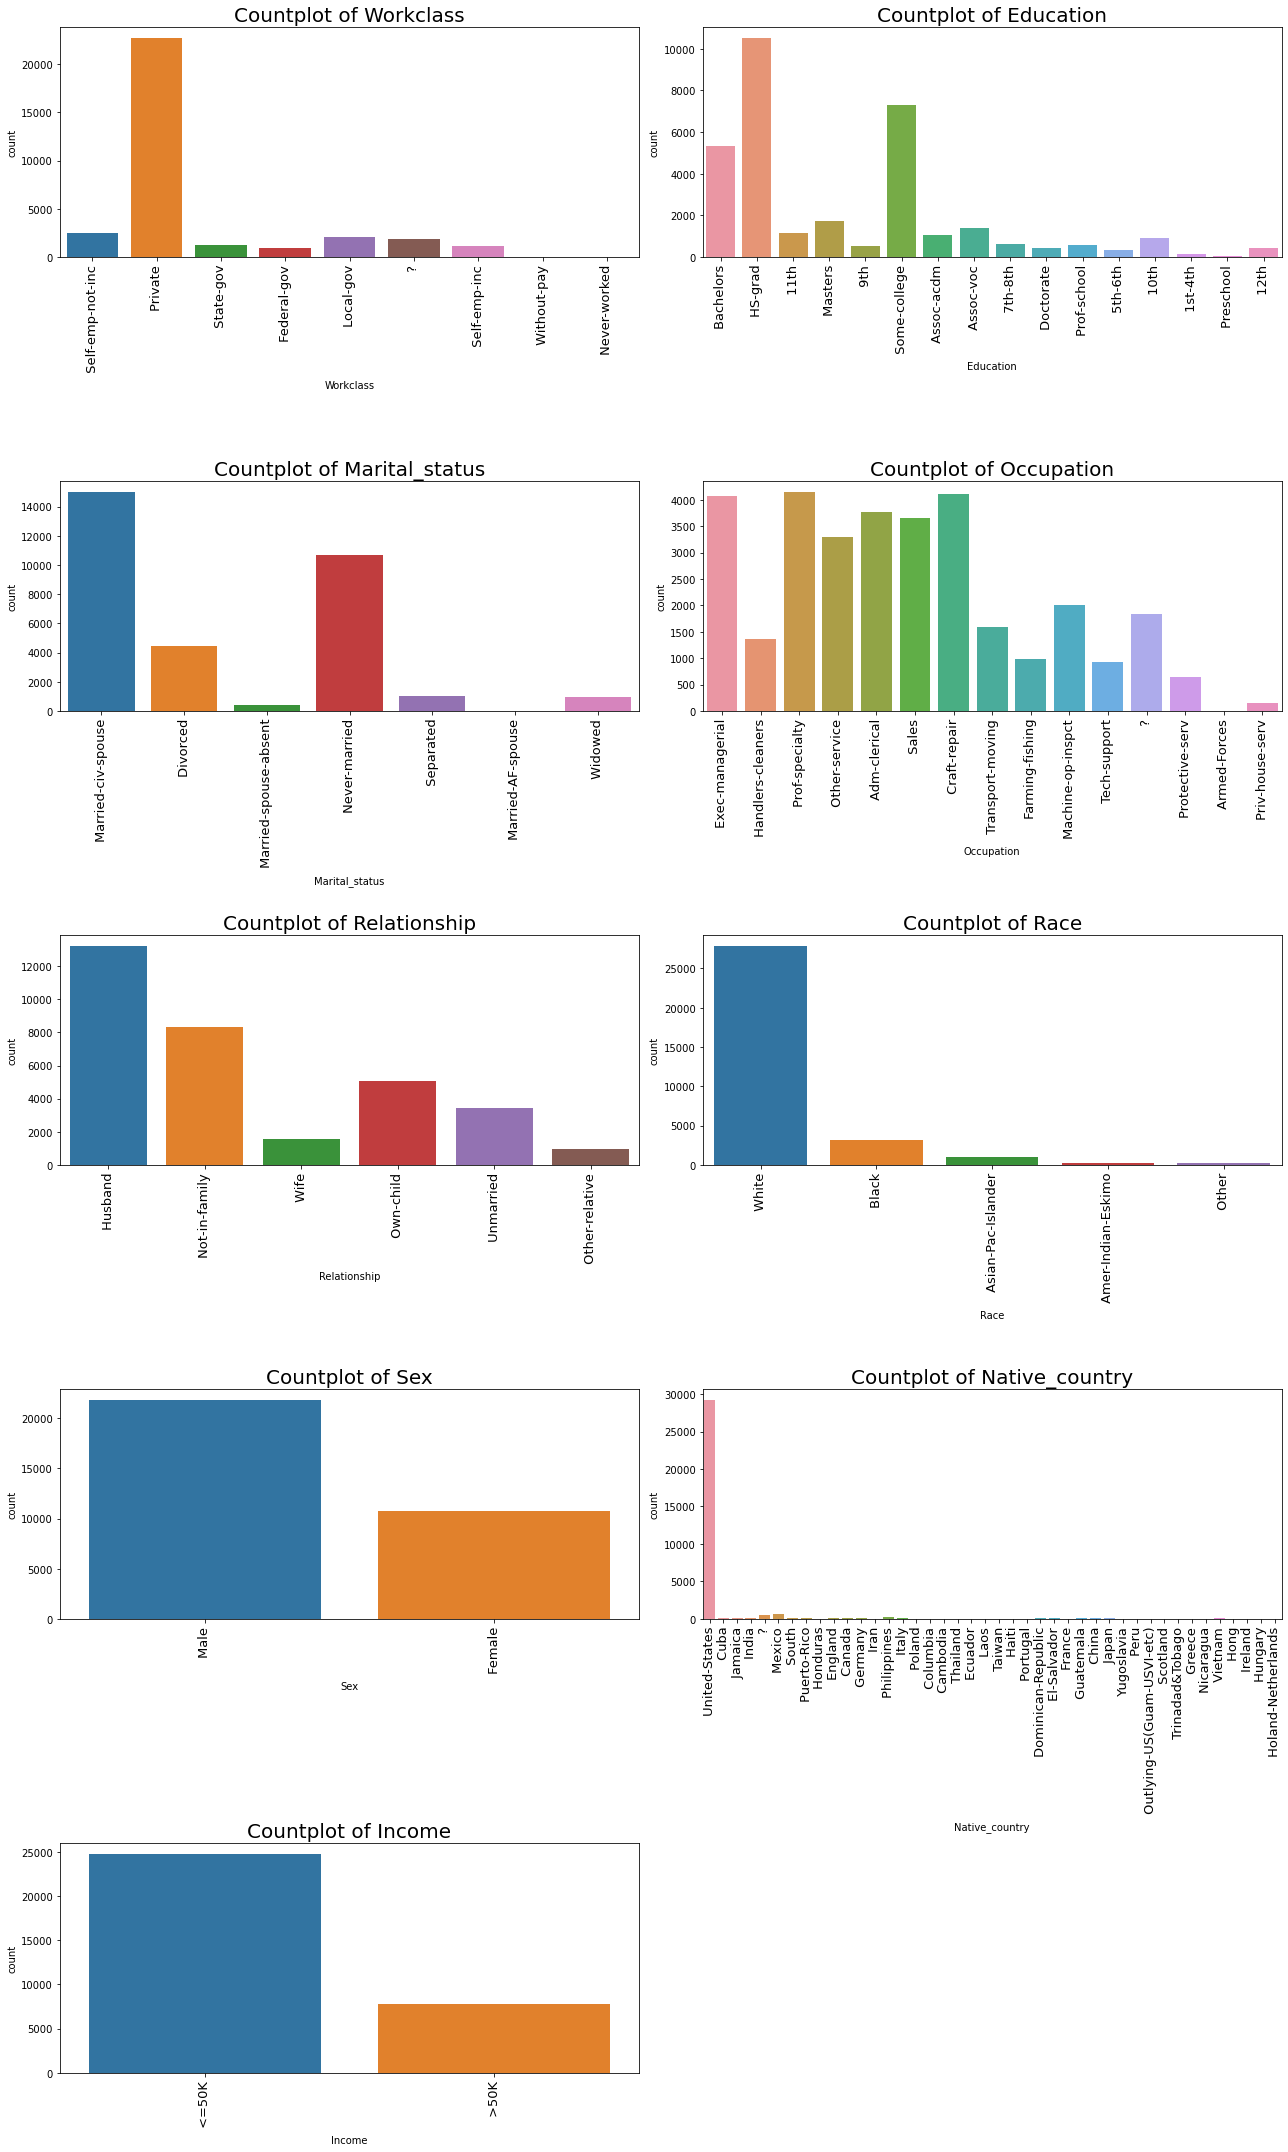

In [35]:
plt.figure(figsize=(18,30))
for i in range(len(col)):
  plt.subplot(5,2,i+1)
  sns.countplot(data[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout()

In [36]:
data.select_dtypes(exclude='object')

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [37]:
col1=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

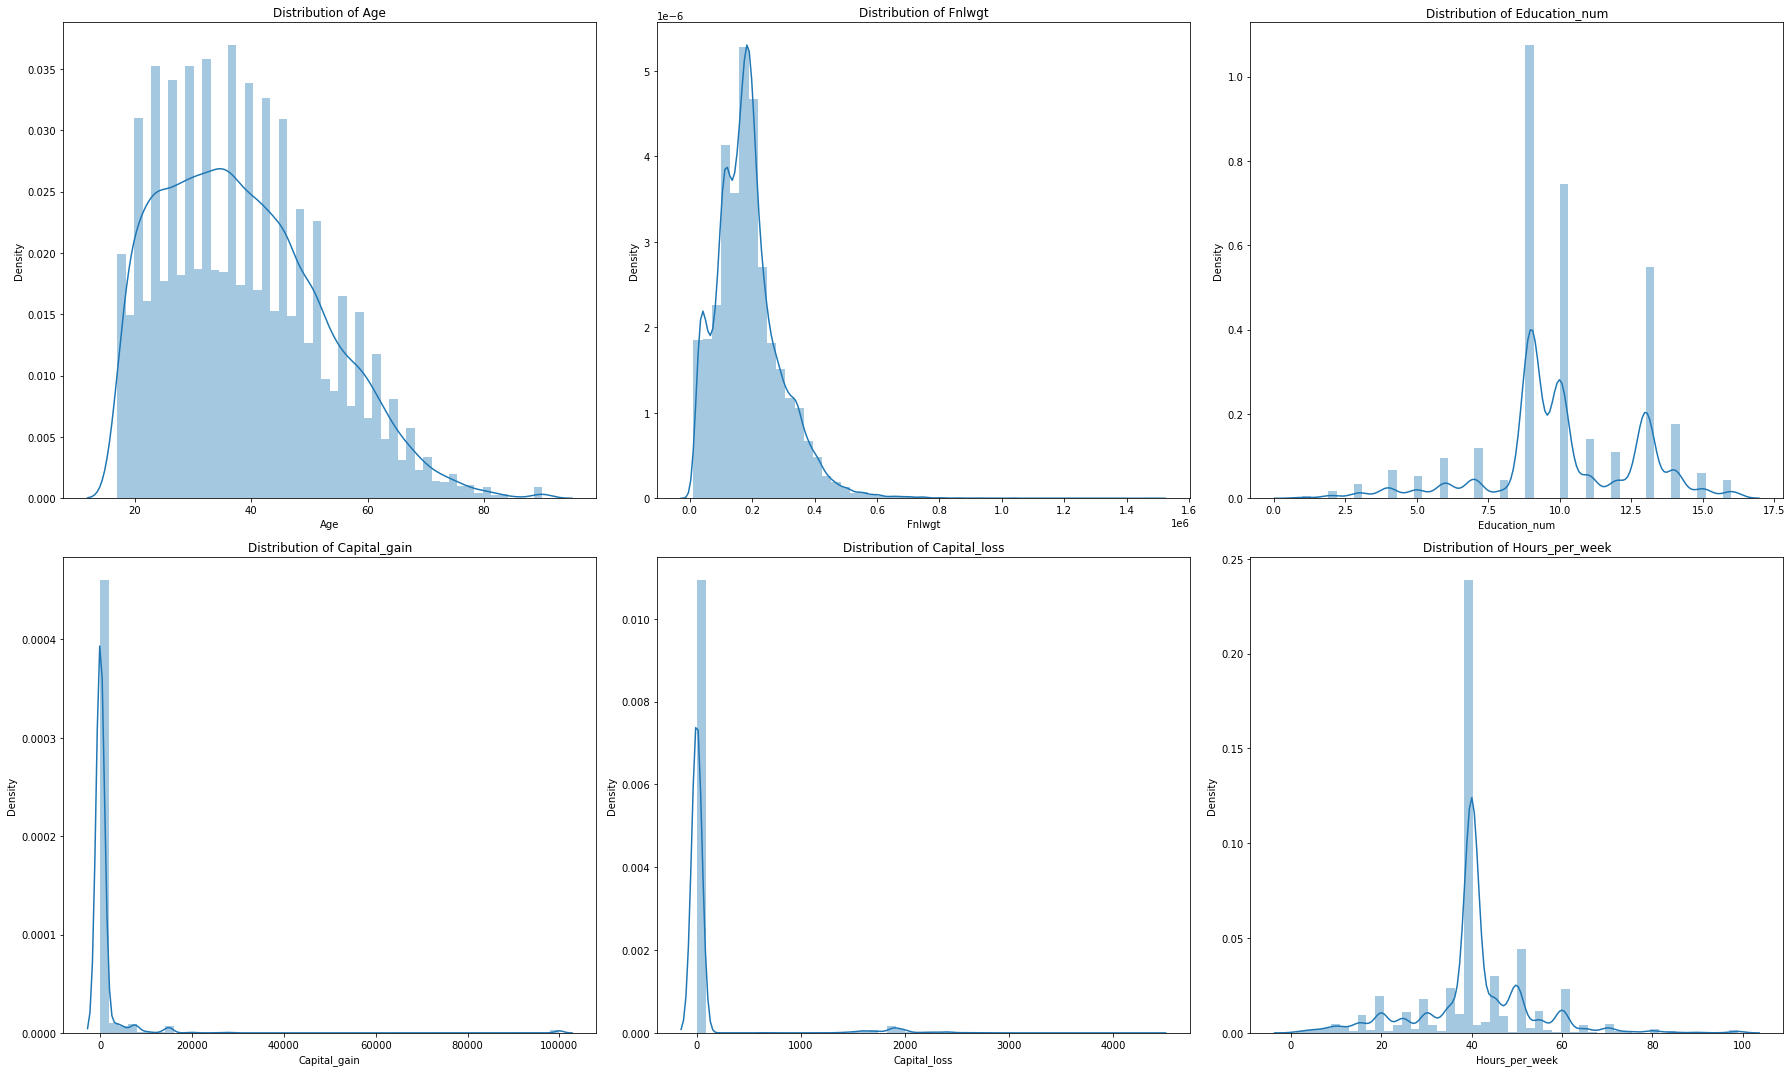

In [38]:
plt.figure(figsize=(25,15))
for i in range(len(col1)):
  plt.subplot(2,3,i+1)
  sns.distplot(data[col1[i]])
  plt.title(f"Distribution of {col1[i]}")
  plt.tight_layout()

In [39]:
col2=['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']

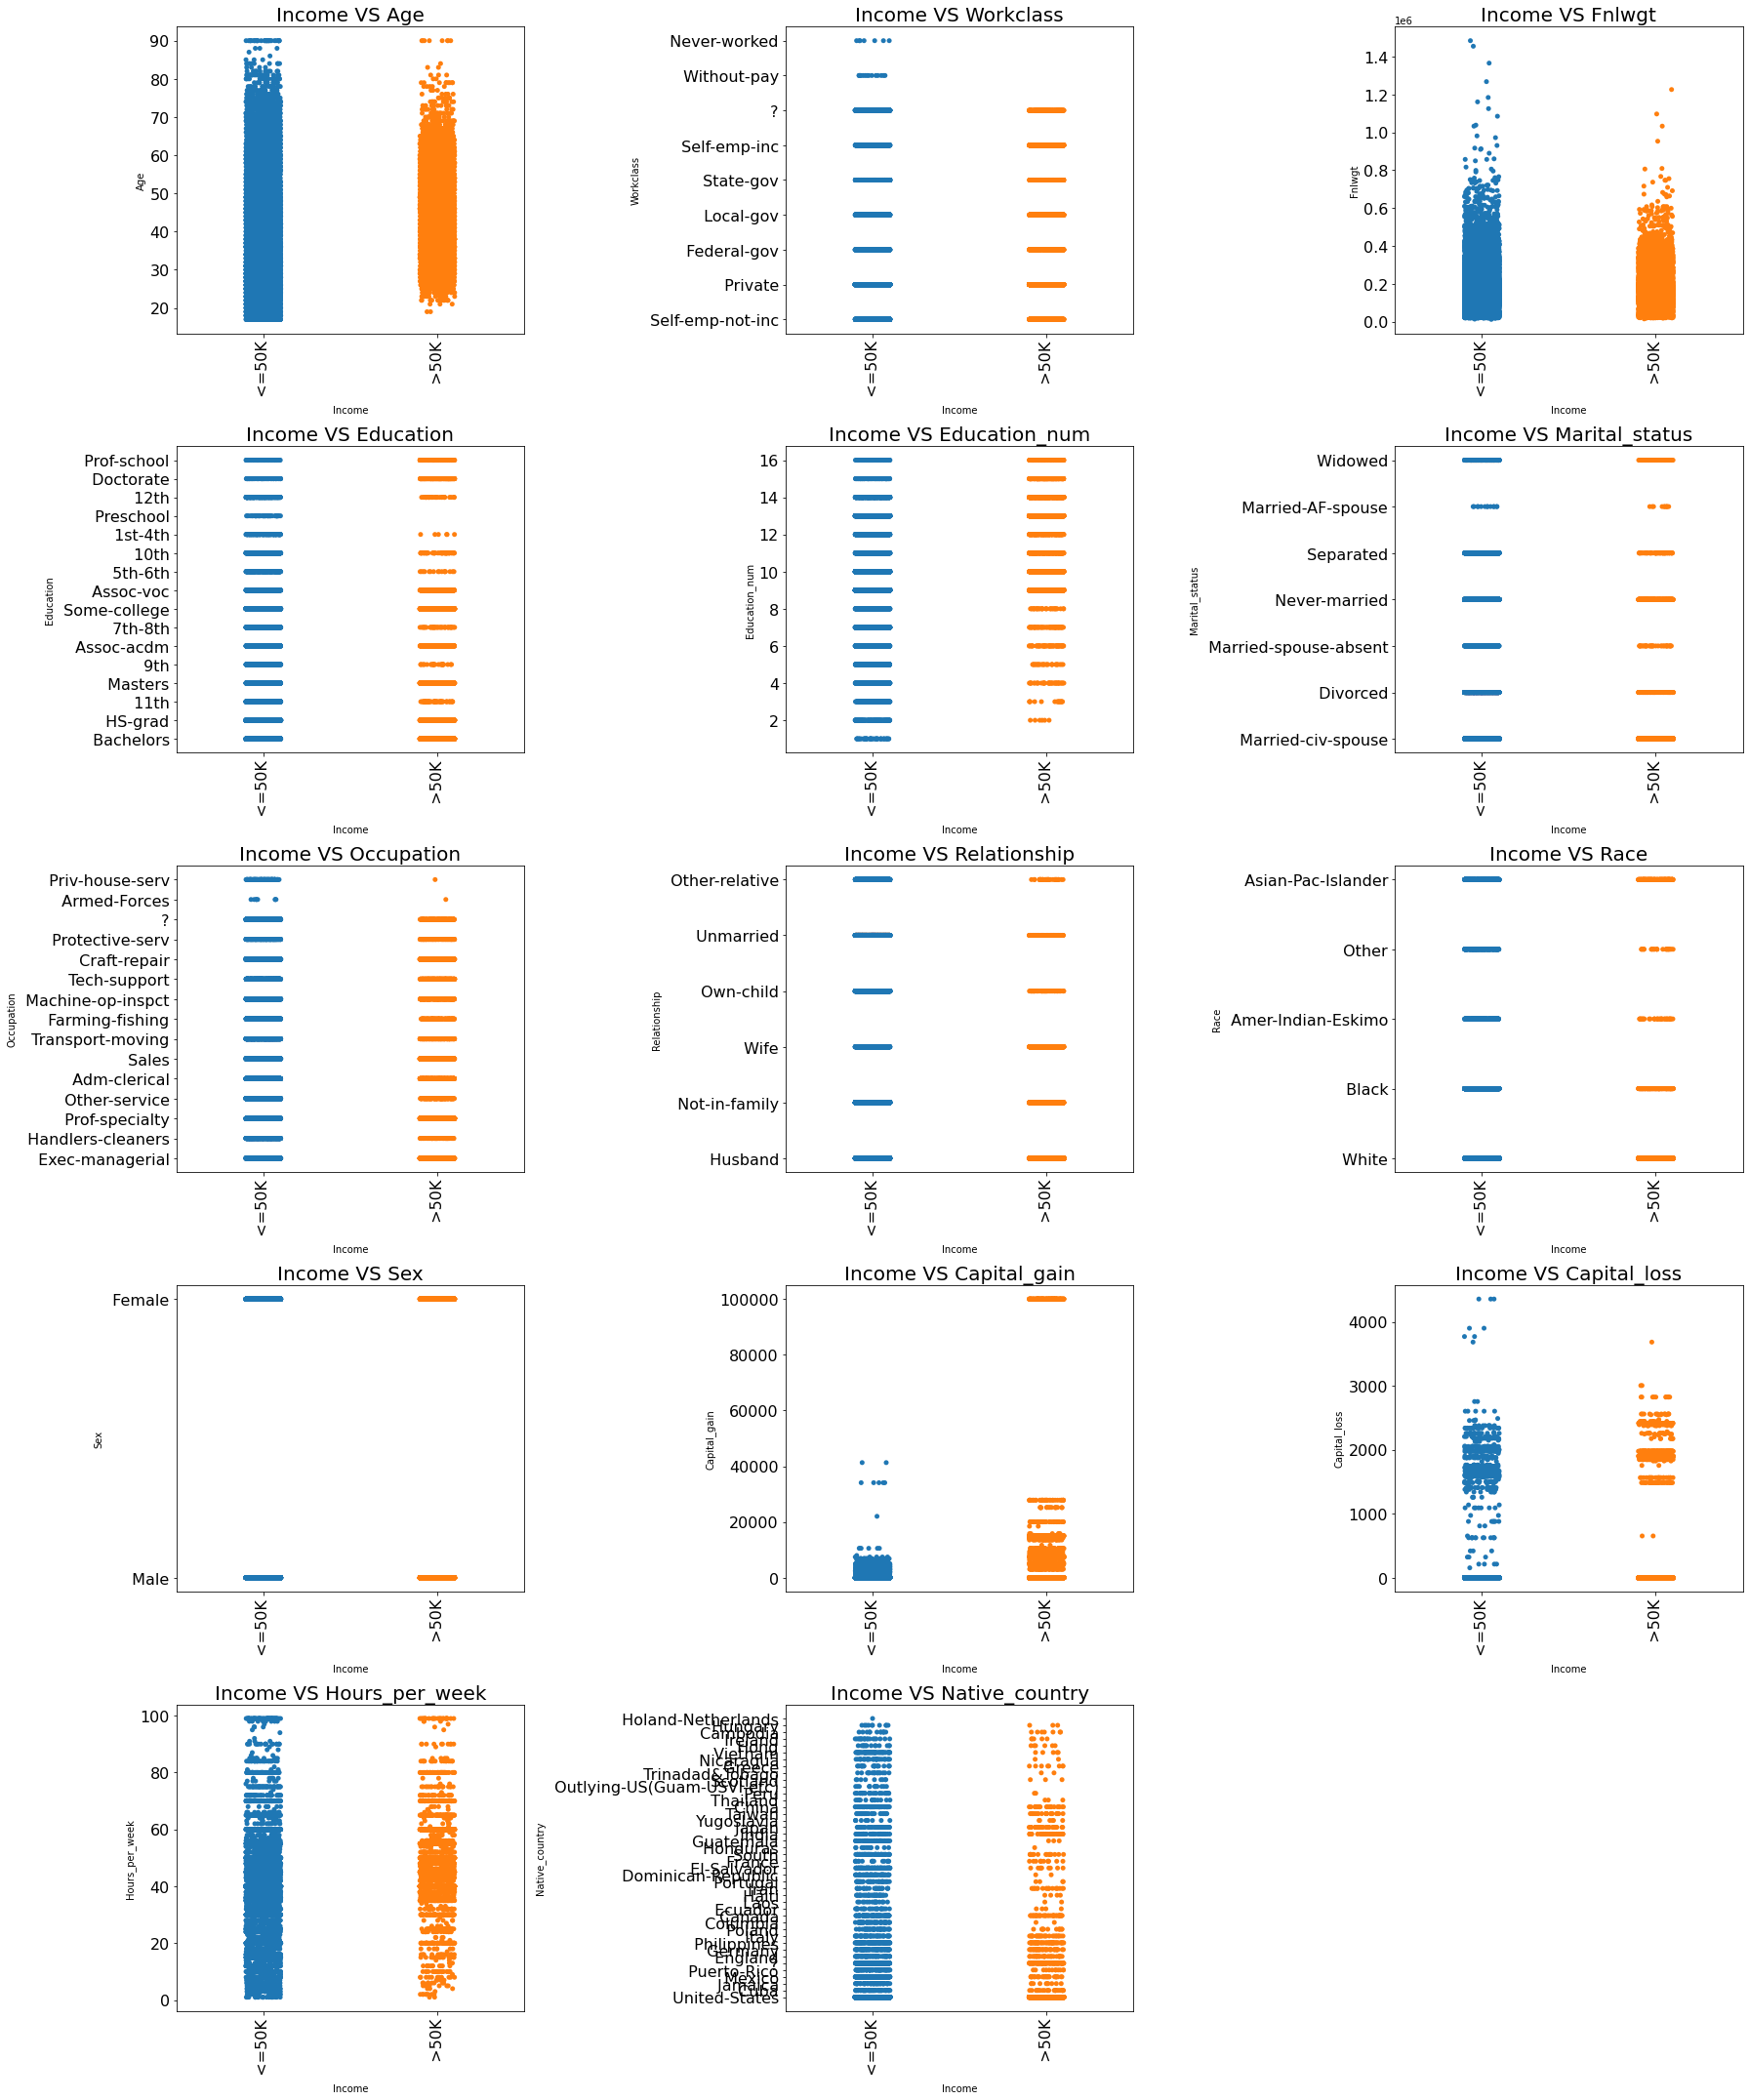

In [40]:
plt.figure(figsize=(25,30))
for i in range(len(col2)):
  plt.subplot(5,3,i+1)
  sns.stripplot(x=data['Income'],y=data[col2[i]])
  plt.title(f"Income VS {col2[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)  
  plt.yticks(fontsize=16)
  plt.tight_layout()

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

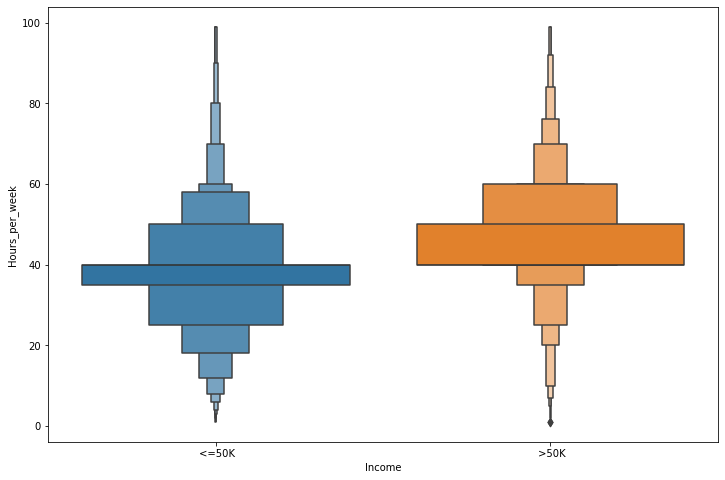

In [41]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='Income',y='Hours_per_week',data=data)

(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

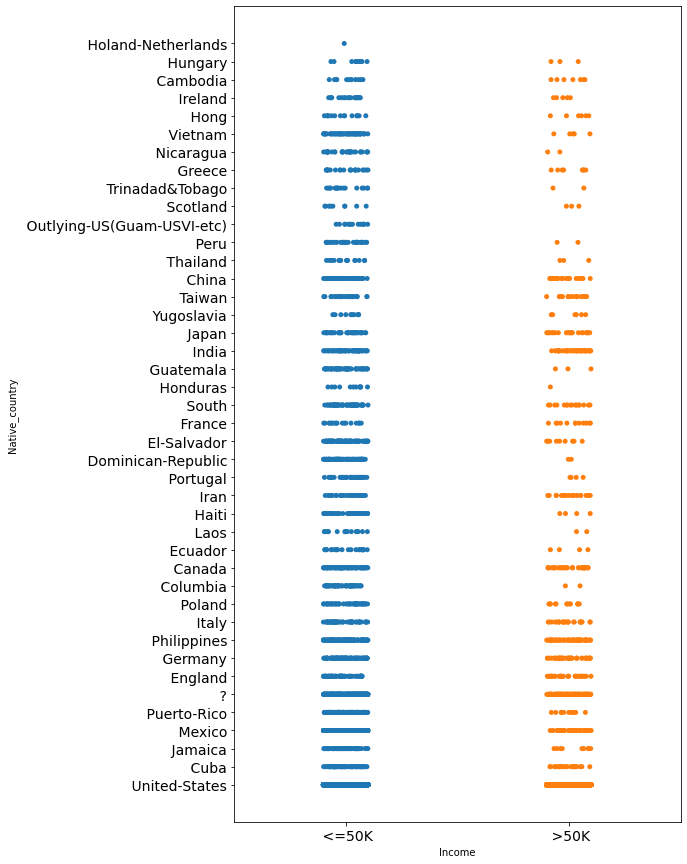

In [42]:
plt.figure(figsize=(8,15))
sns.stripplot(x='Income',y='Native_country',data=data)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

In [44]:
col3=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income','Education_num']

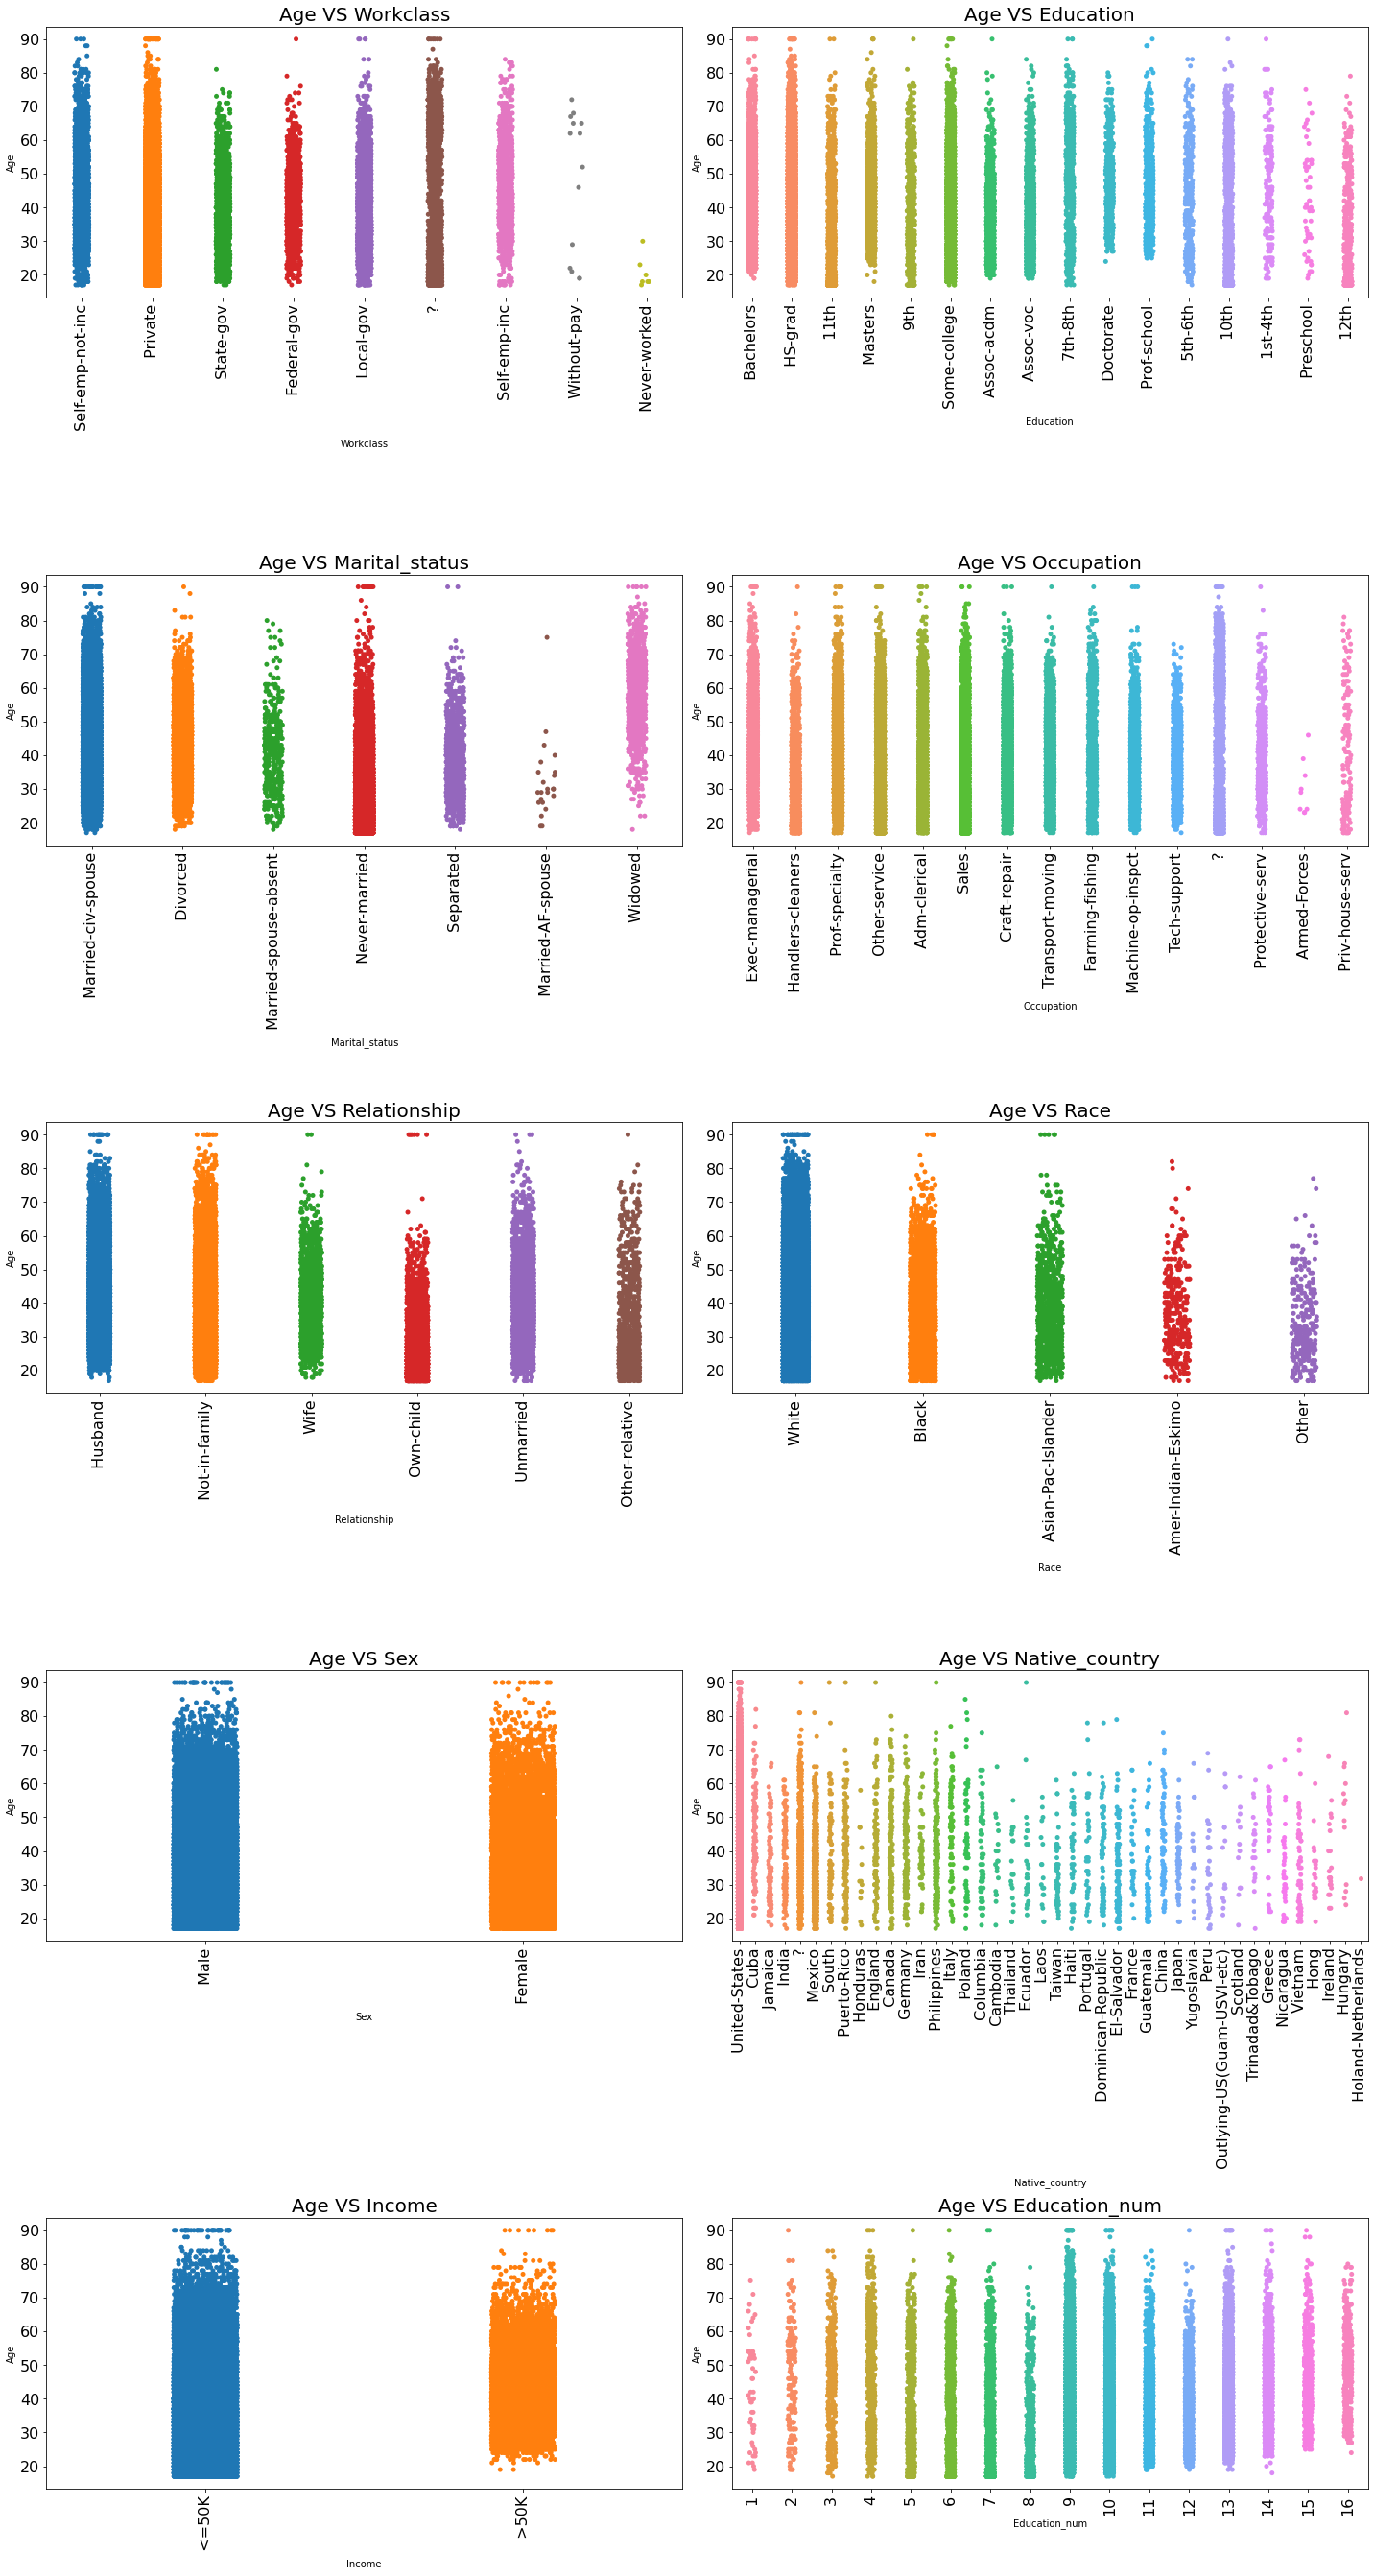

In [45]:
plt.figure(figsize=(20,60))
for i in range(len(col3)):
  plt.subplot(8,2,i+1)
  sns.stripplot(y=data['Age'],x=data[col3[i]])
  plt.title(f"Age VS {col3[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)  
  plt.yticks(fontsize=16)
  plt.tight_layout()

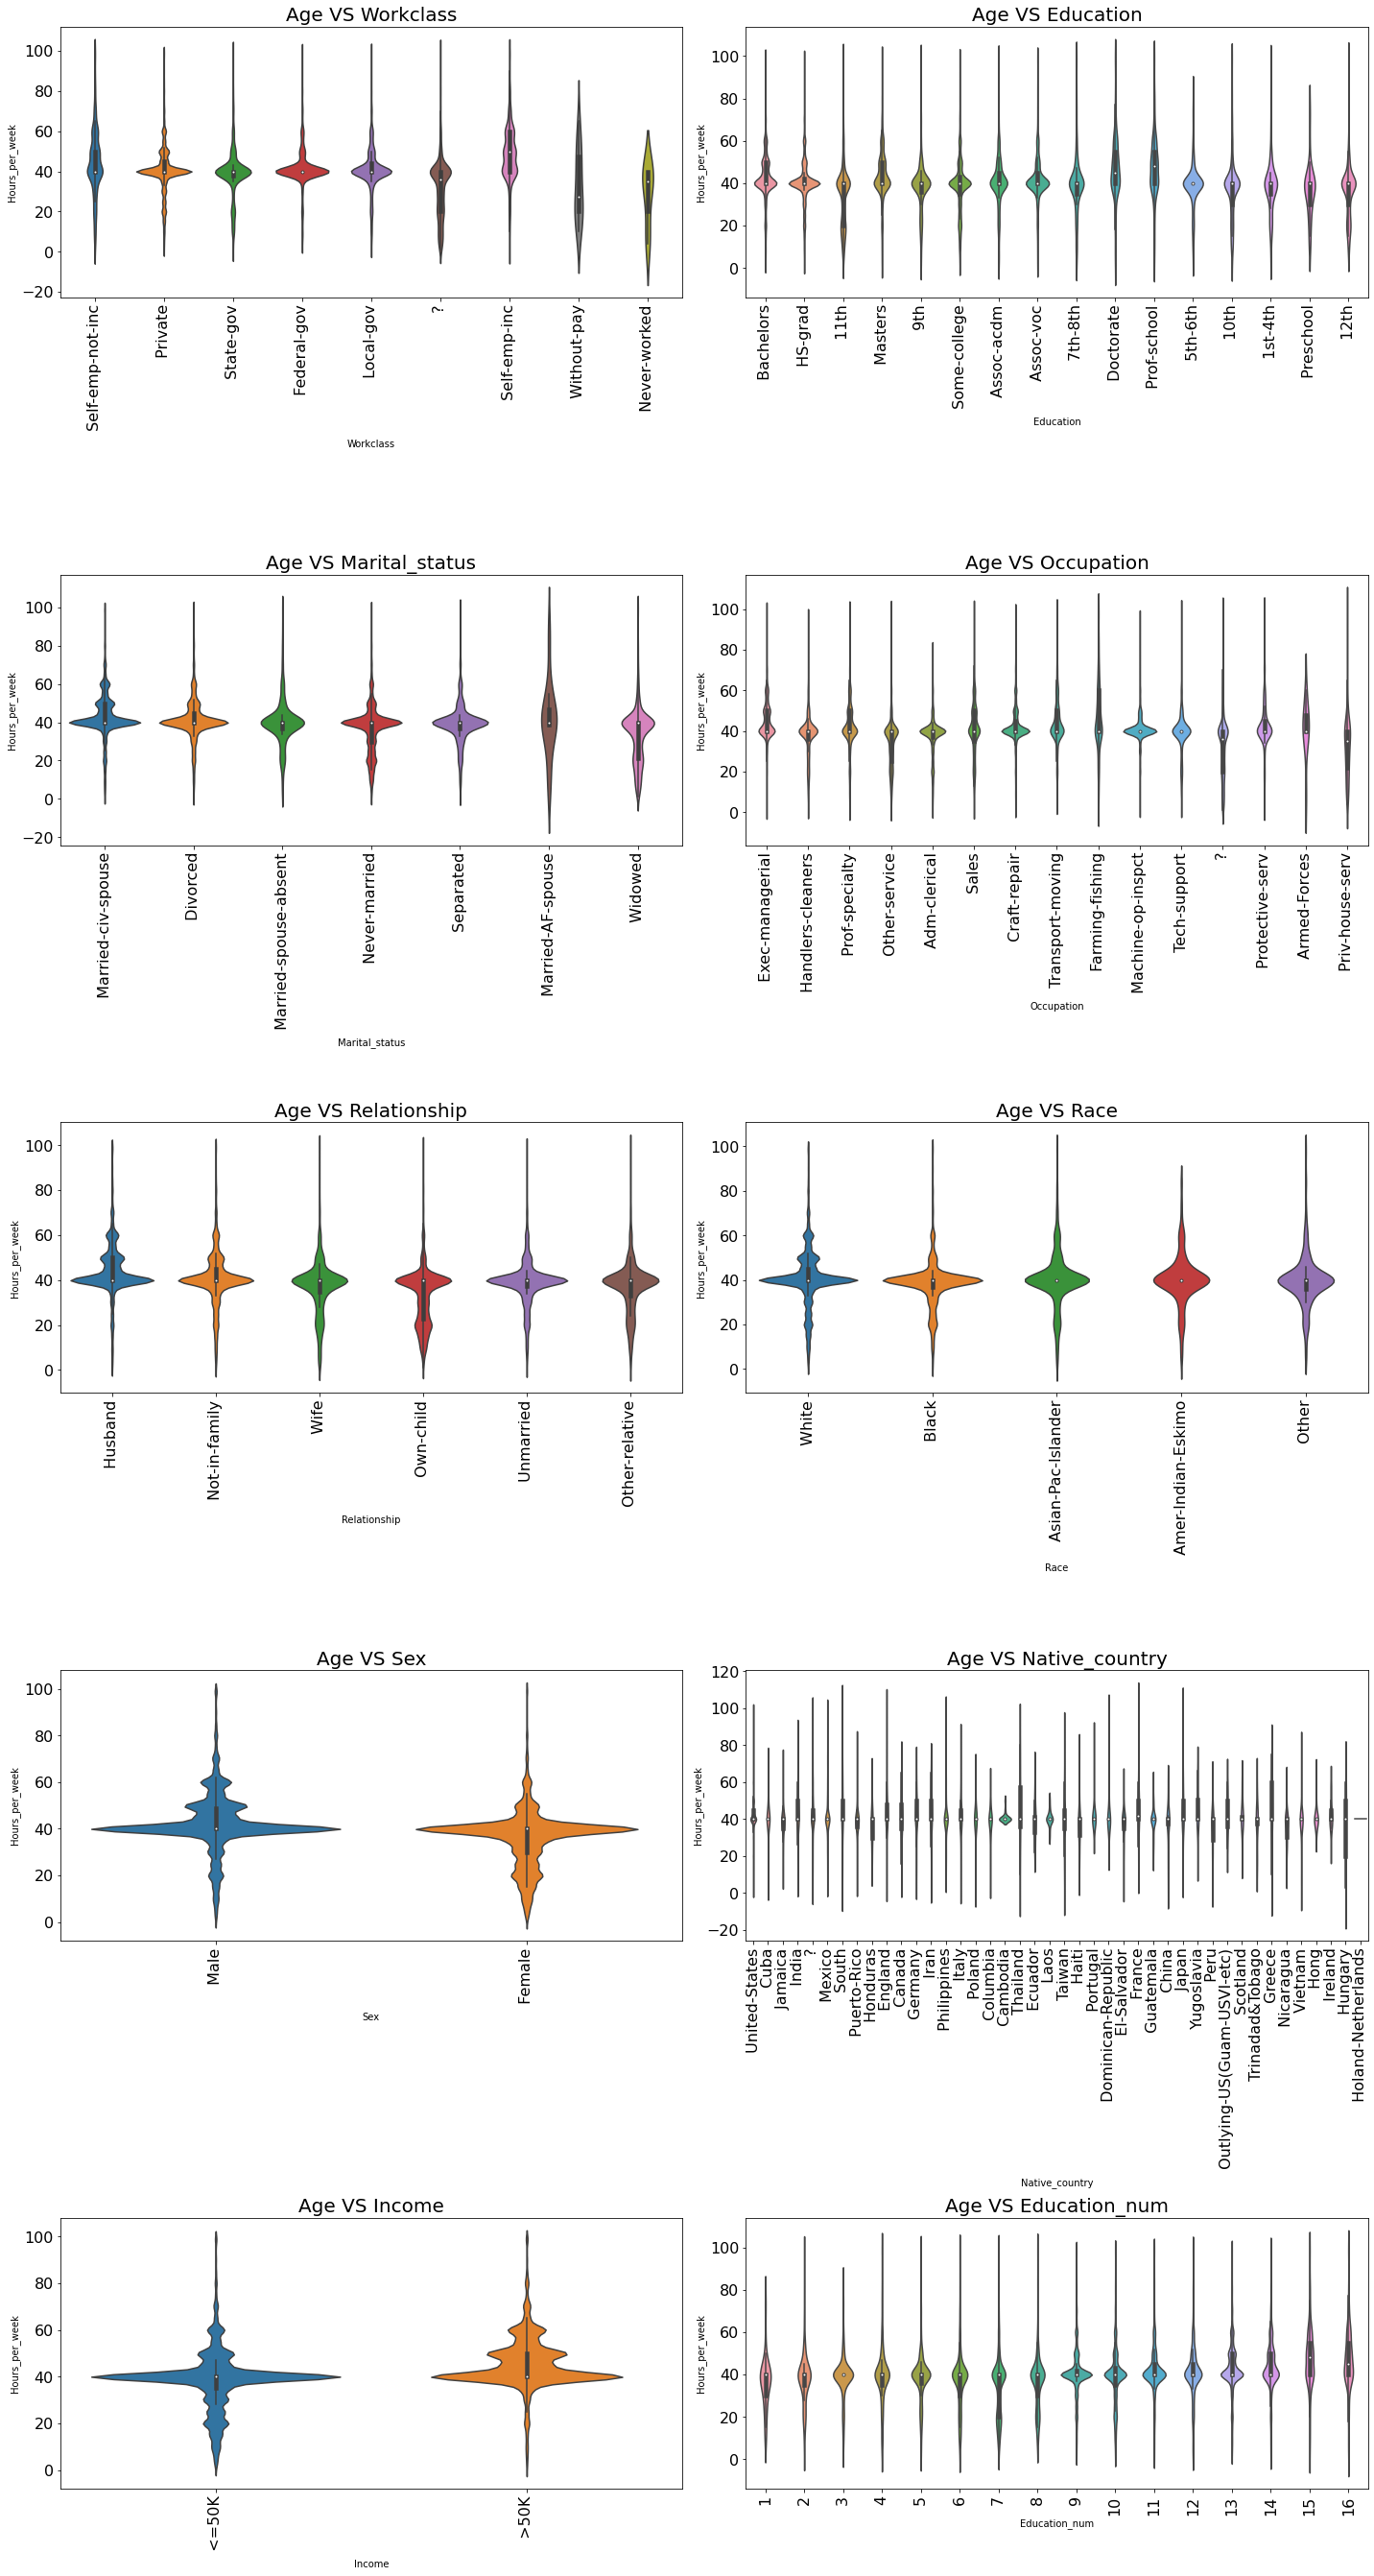

In [46]:
plt.figure(figsize=(20,60))
for i in range(len(col3)):
  plt.subplot(8,2,i+1)
  sns.violinplot(y=data['Hours_per_week'],x=data[col3[i]])
  plt.title(f"Age VS {col3[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)  
  plt.yticks(fontsize=16)
  plt.tight_layout()

In [47]:
data0=data.groupby(['Age',"Income"]).apply(lambda x:x['Hours_per_week'].count()).reset_index(name='Hours')

Text(0.5, 1.0, 'Income VS Work Of Hours')

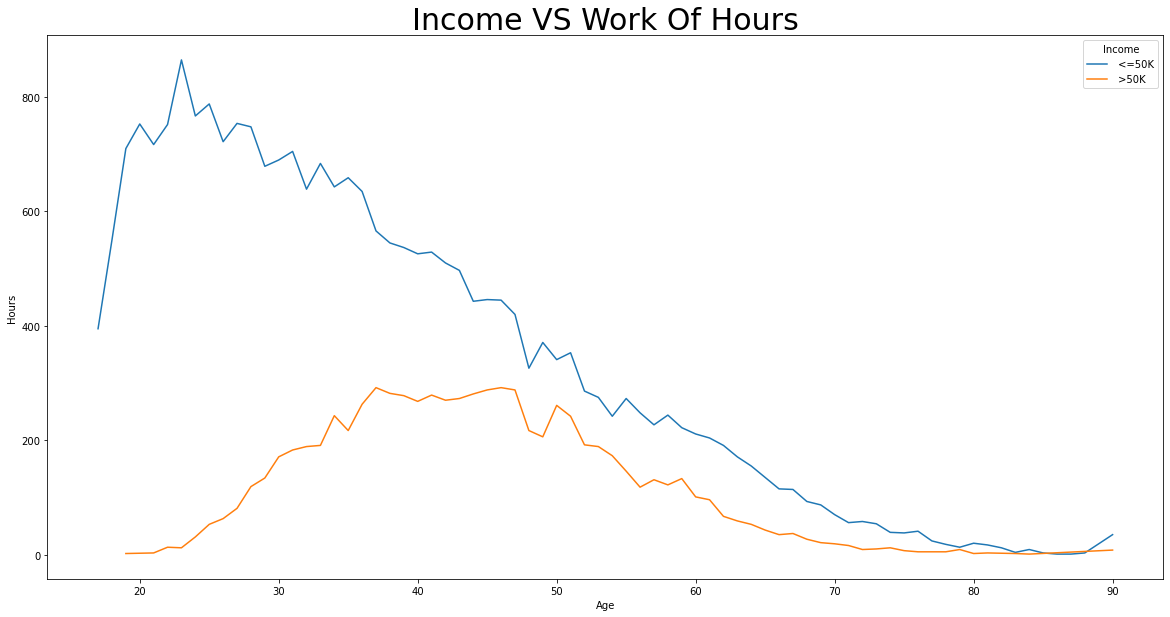

In [48]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='Hours',data=data0,hue='Income')
plt.title("Income VS Work Of Hours",fontsize=30)

Text(0.5, 1.0, 'Income Vs Age')

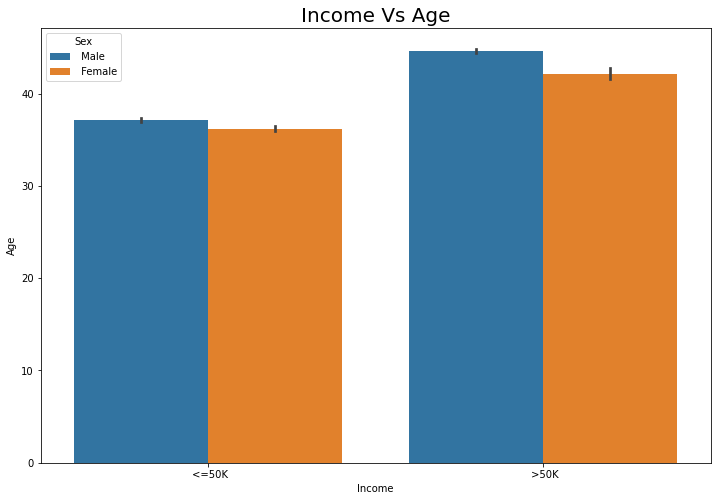

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(x='Income',y='Age',data=data,hue='Sex')
plt.title("Income Vs Age",fontsize=20)

<Figure size 864x576 with 0 Axes>

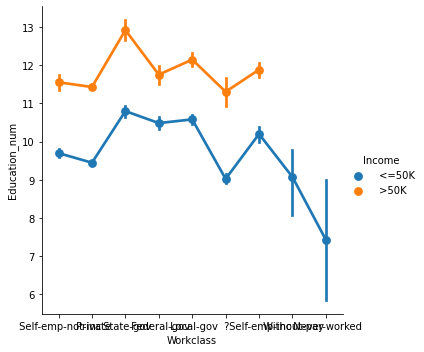

In [50]:
plt.figure(figsize=(12,8))
sns.factorplot(x='Workclass',y='Education_num',hue='Income',data=data)

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

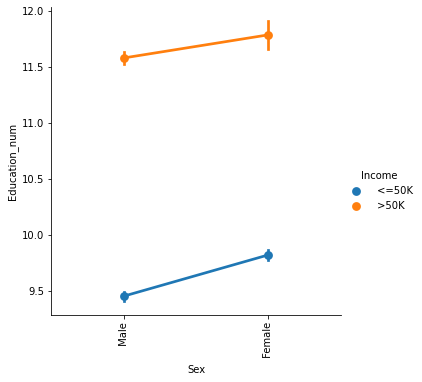

In [51]:
sns.factorplot(x='Sex',y='Education_num',data=data,hue='Income')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

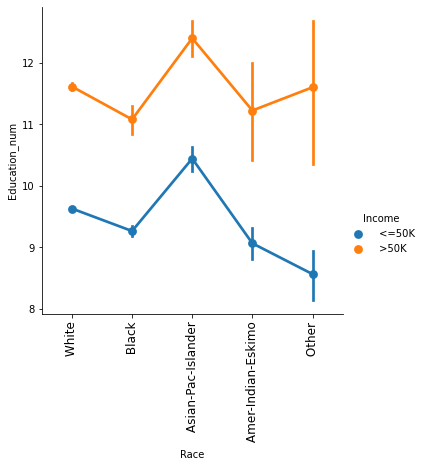

In [52]:
sns.factorplot(x='Race',y='Education_num',hue='Income',data=data)
plt.xticks(rotation=90,fontsize=12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

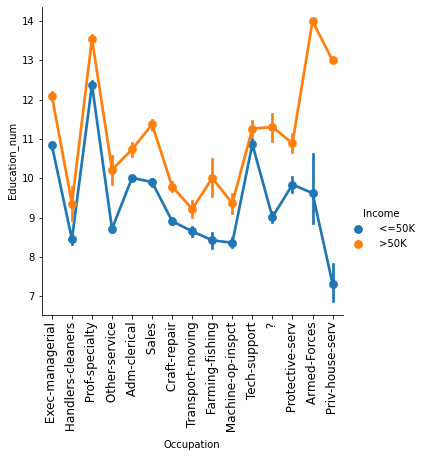

In [53]:
sns.factorplot(x='Occupation',y='Education_num',hue="Income",data=data)
plt.xticks(rotation=90,fontsize=12)

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

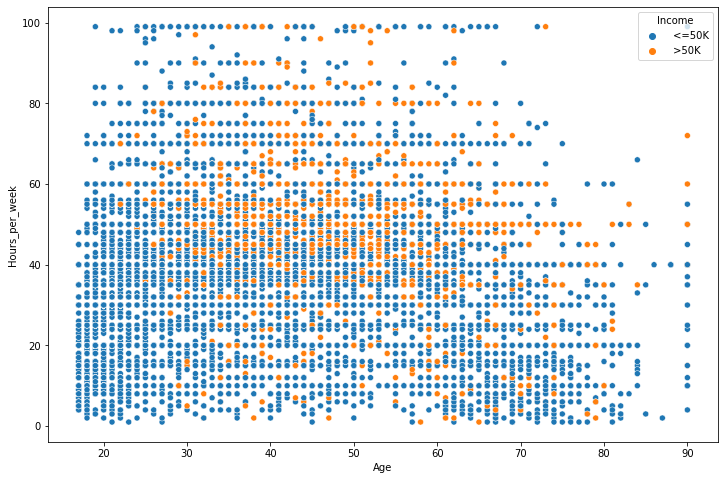

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age',y='Hours_per_week',data=data,hue='Income')

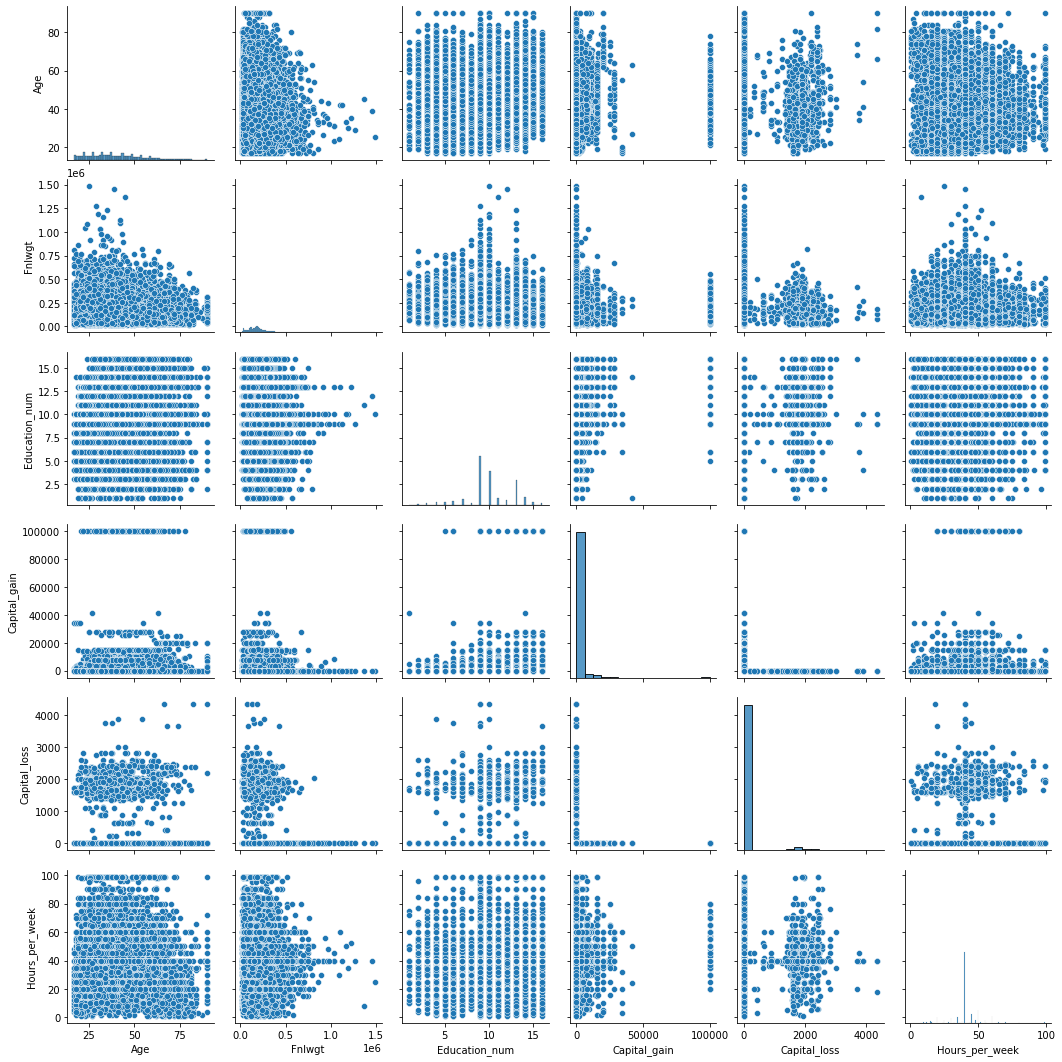

In [55]:
sns.pairplot(data)

In [56]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Workclass': 9,
 'Education': 16,
 'Marital_status': 7,
 'Occupation': 15,
 'Relationship': 6,
 'Race': 5,
 'Sex': 2,
 'Native_country': 42,
 'Income': 2}

In [57]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,power_transform

In [58]:
Oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df[column]=Oe.fit_transform(df[column])
  return df

In [59]:
data=ordinal_encoder(data,['Education','Income','Marital_status','Occupation','Race','Relationship','Sex','Workclass'])

In [60]:
def preprocessing(df):
  df=df.copy()
  le=LabelEncoder()
  df['Native_country']=le.fit_transform(df['Native_country'])
  X=df.drop('Income',axis=1)
  y=df['Income']
  return X,y

In [62]:
X,y=preprocessing(data)
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39


In [63]:
x=X

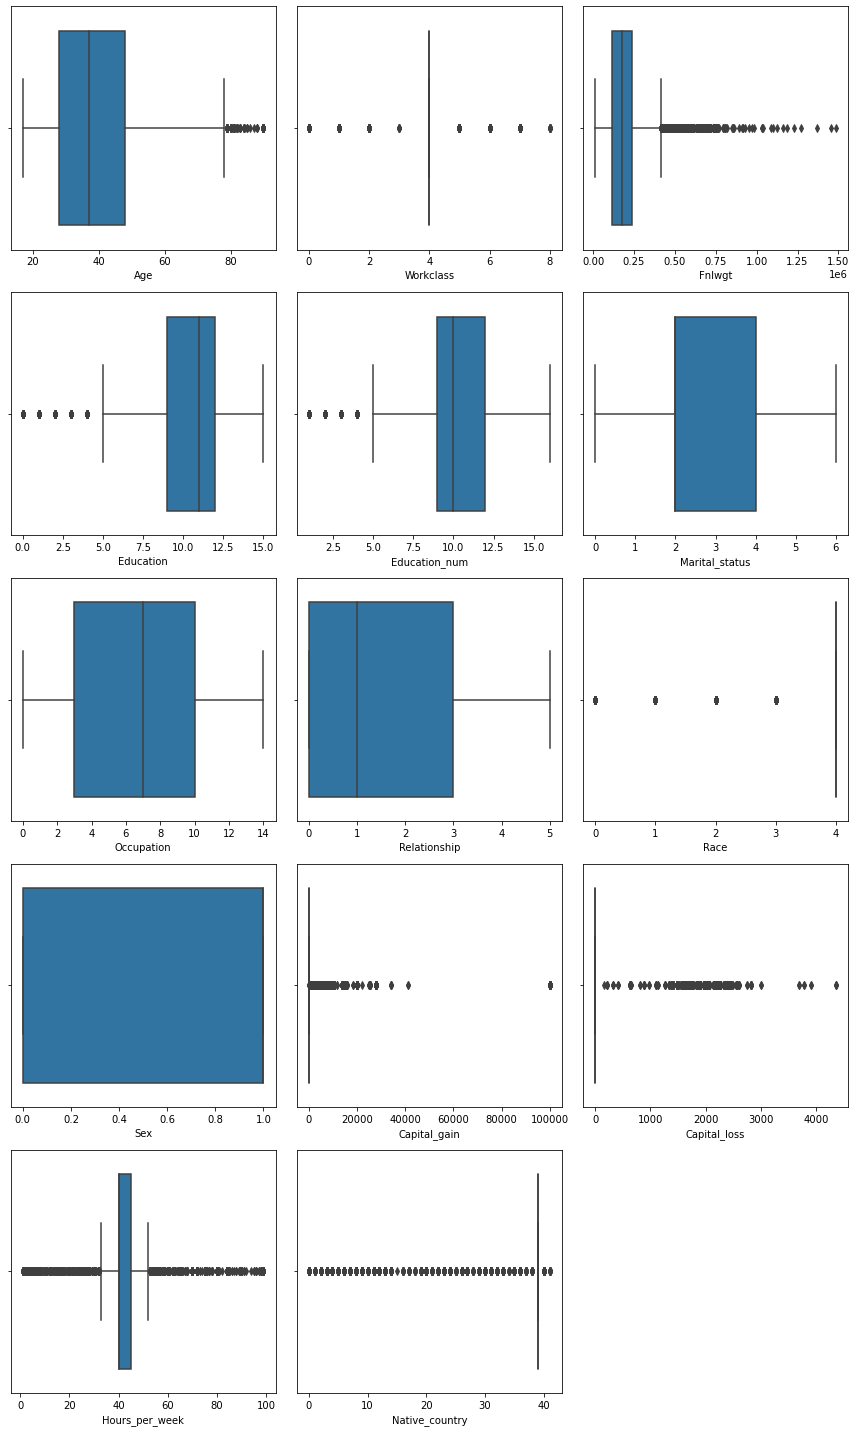

In [64]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(5,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

In [65]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]]=percentile[0]
  X[col][X[col]>=percentile[1]]=percentile[1]

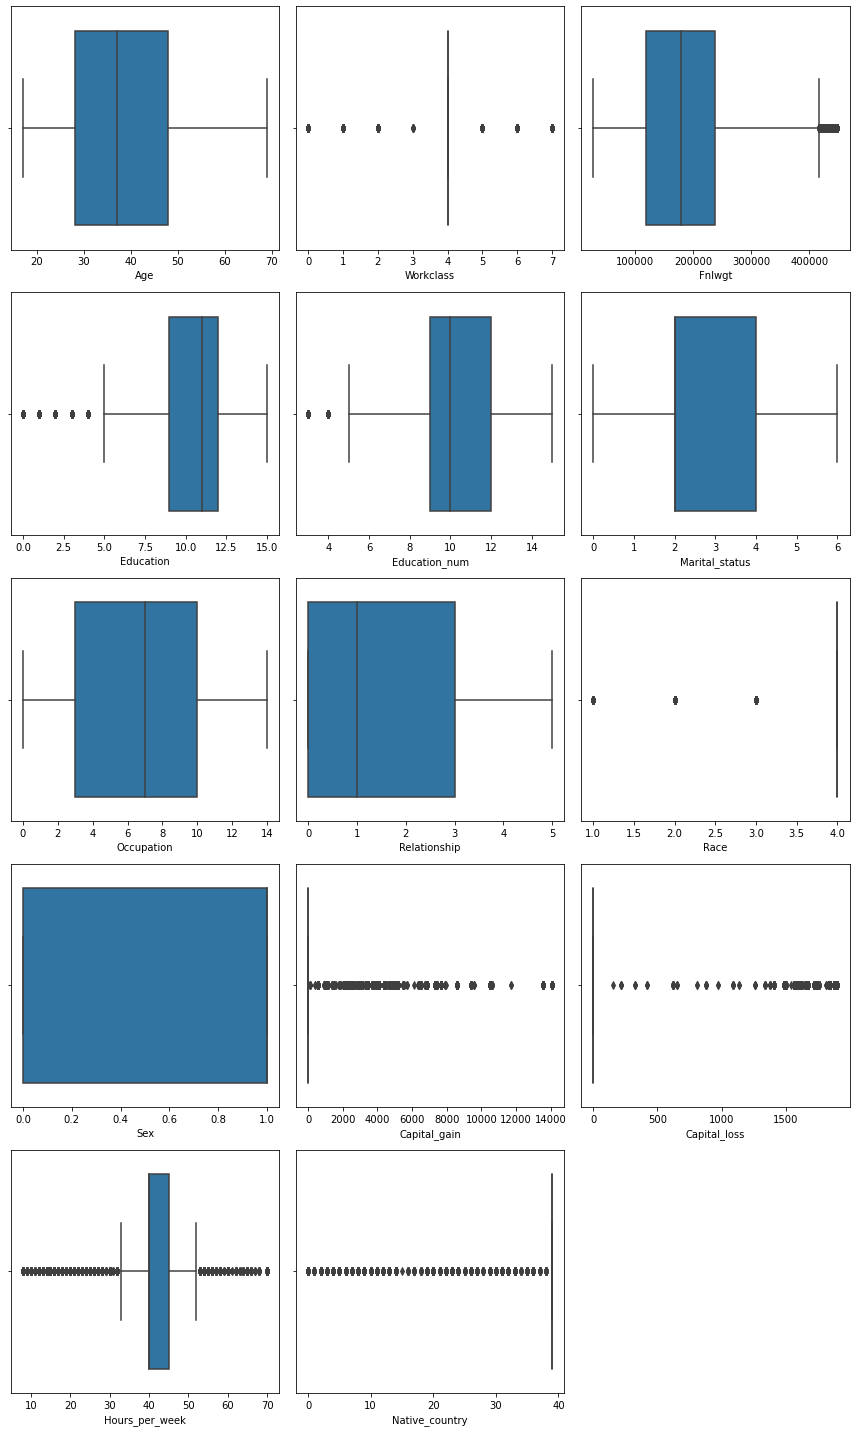

In [66]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(5,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

In [67]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Income'])

Text(0.5, 1.0, 'Balanced data')

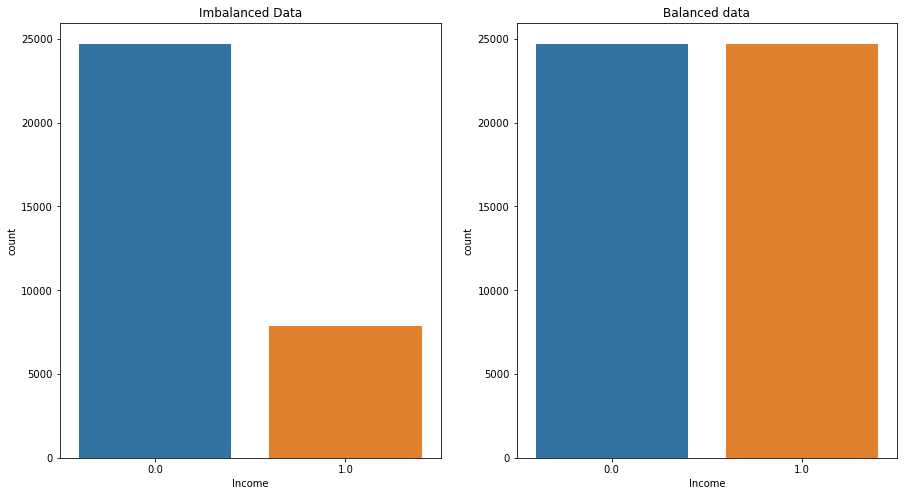

In [68]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(data['Income'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Income'])
plt.title("Balanced data")

In [69]:
print(data.shape)
print(X_new.shape)

(32560, 15)
(49438, 14)


In [70]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold

In [71]:
X.skew()

Age               0.418990
Workclass        -0.758618
Fnlwgt            0.649592
Education        -0.934063
Education_num    -0.302045
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.273252
Sex              -0.719244
Capital_gain      4.455096
Capital_loss      4.394450
Hours_per_week   -0.237606
Native_country   -3.658844
dtype: float64

In [72]:
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [73]:
X_new.skew()

Age              -0.041018
Workclass         0.084511
Fnlwgt           -0.031511
Education        -0.208025
Education_num    -0.023160
Marital_status    0.004875
Occupation       -0.177872
Relationship      0.290579
Race             -2.003467
Sex              -0.962074
Capital_gain      2.247807
Capital_loss      3.547217
Hours_per_week    0.121682
Native_country   -2.555606
dtype: float64

In [74]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [78]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install scikit-plot
import scikitplot as skplt

In [79]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "ExtraTreesClassifier":ExtraTreesClassifier(),
    "RandomForestClassifier":RandomForestClassifier()}

In [88]:
skf=StratifiedKFold(n_splits=5,shuffle=True)
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  ac=accuracy_score(y_test,y_pred)
  Score.append(ac)
  print("Accuracy_Score",ac)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion metrics')
  print('\n')
  print(cm)
  print("CLASSIFICATION REPORT")
  report=classification_report(y_test,y_pred)
  print('\n')
  print(report)
  csv=cross_val_score(model,X_new,y_new,cv=skf).mean()
  CVS.append(csv*100)
  print("Cross_Val_Score",csv)

*************************************************** LogisticRegression ************************************************************


Accuracy_Score 0.7690129449838188


SCORE 0.7690129449838188


Confusion metrics


[[5543 1866]
 [1560 5863]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76      7409
         1.0       0.76      0.79      0.77      7423

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832

Cross_Val_Score 0.7661920232609065
*************************************************** DecisionTreeClassifier ************************************************************


Accuracy_Score 0.8656957928802589


SCORE 0.8656957928802589


Confusion metrics


[[6376 1033]
 [ 959 6464]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86